# Problem Statement:

# Sales Channel Prediction Case Study  

# When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

# The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

# Lets import our libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# checking for null values and as we can see we dont have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
# Lets check number of records
df.shape

(200, 5)

# Exploratory data analysis

In [5]:
# Lets check the statistics of this data and the shape
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
# There are three features and one label so this is likely a regression problem.
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
# lets drop the first column because its not needed.
df = df.drop('Unnamed: 0',axis=1)
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

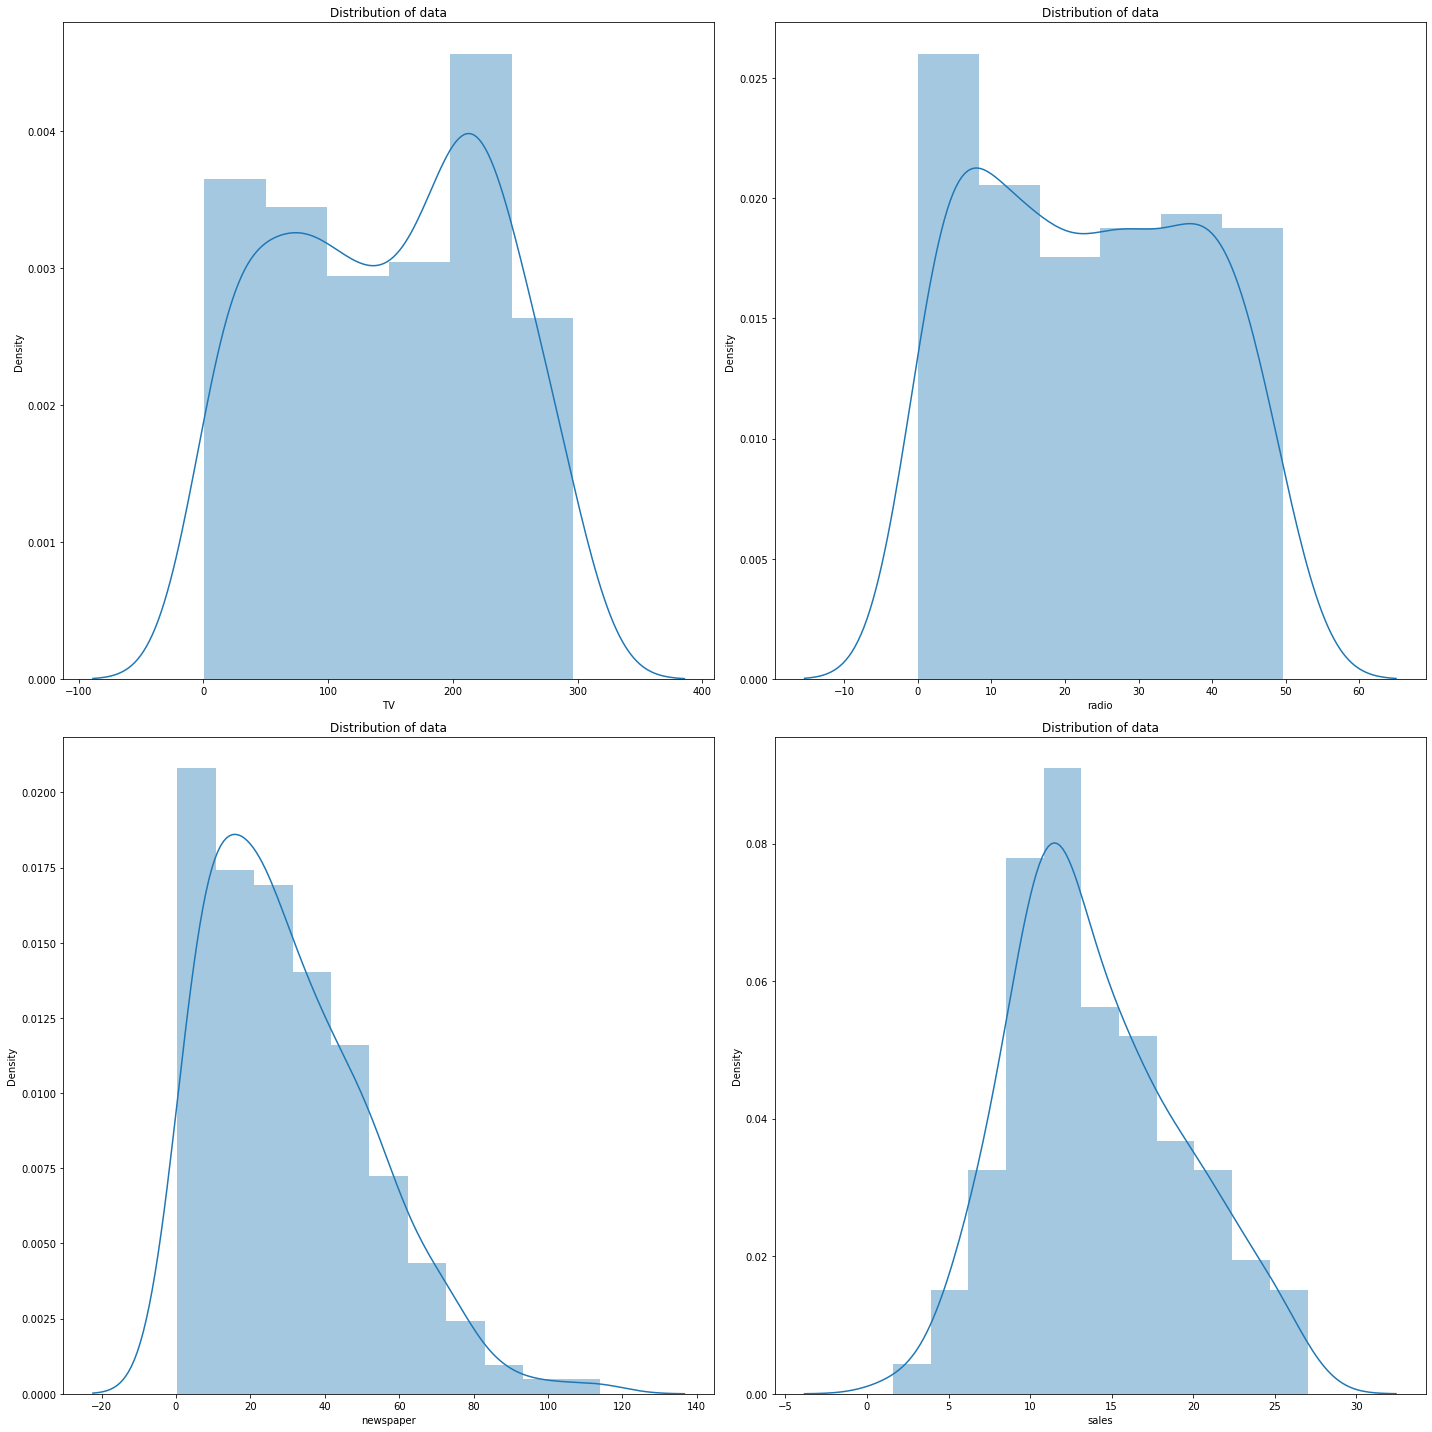

In [10]:
# Lets do some visualisations
# Bivariate analysis

plt.figure(figsize=(20,20))

plotnumber = 1

for column in df:
    if plotnumber<=4:
        plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.title('Distribution of data')
        plt.xlabel(column)
    plotnumber+=1
    
plt.tight_layout()    

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-p

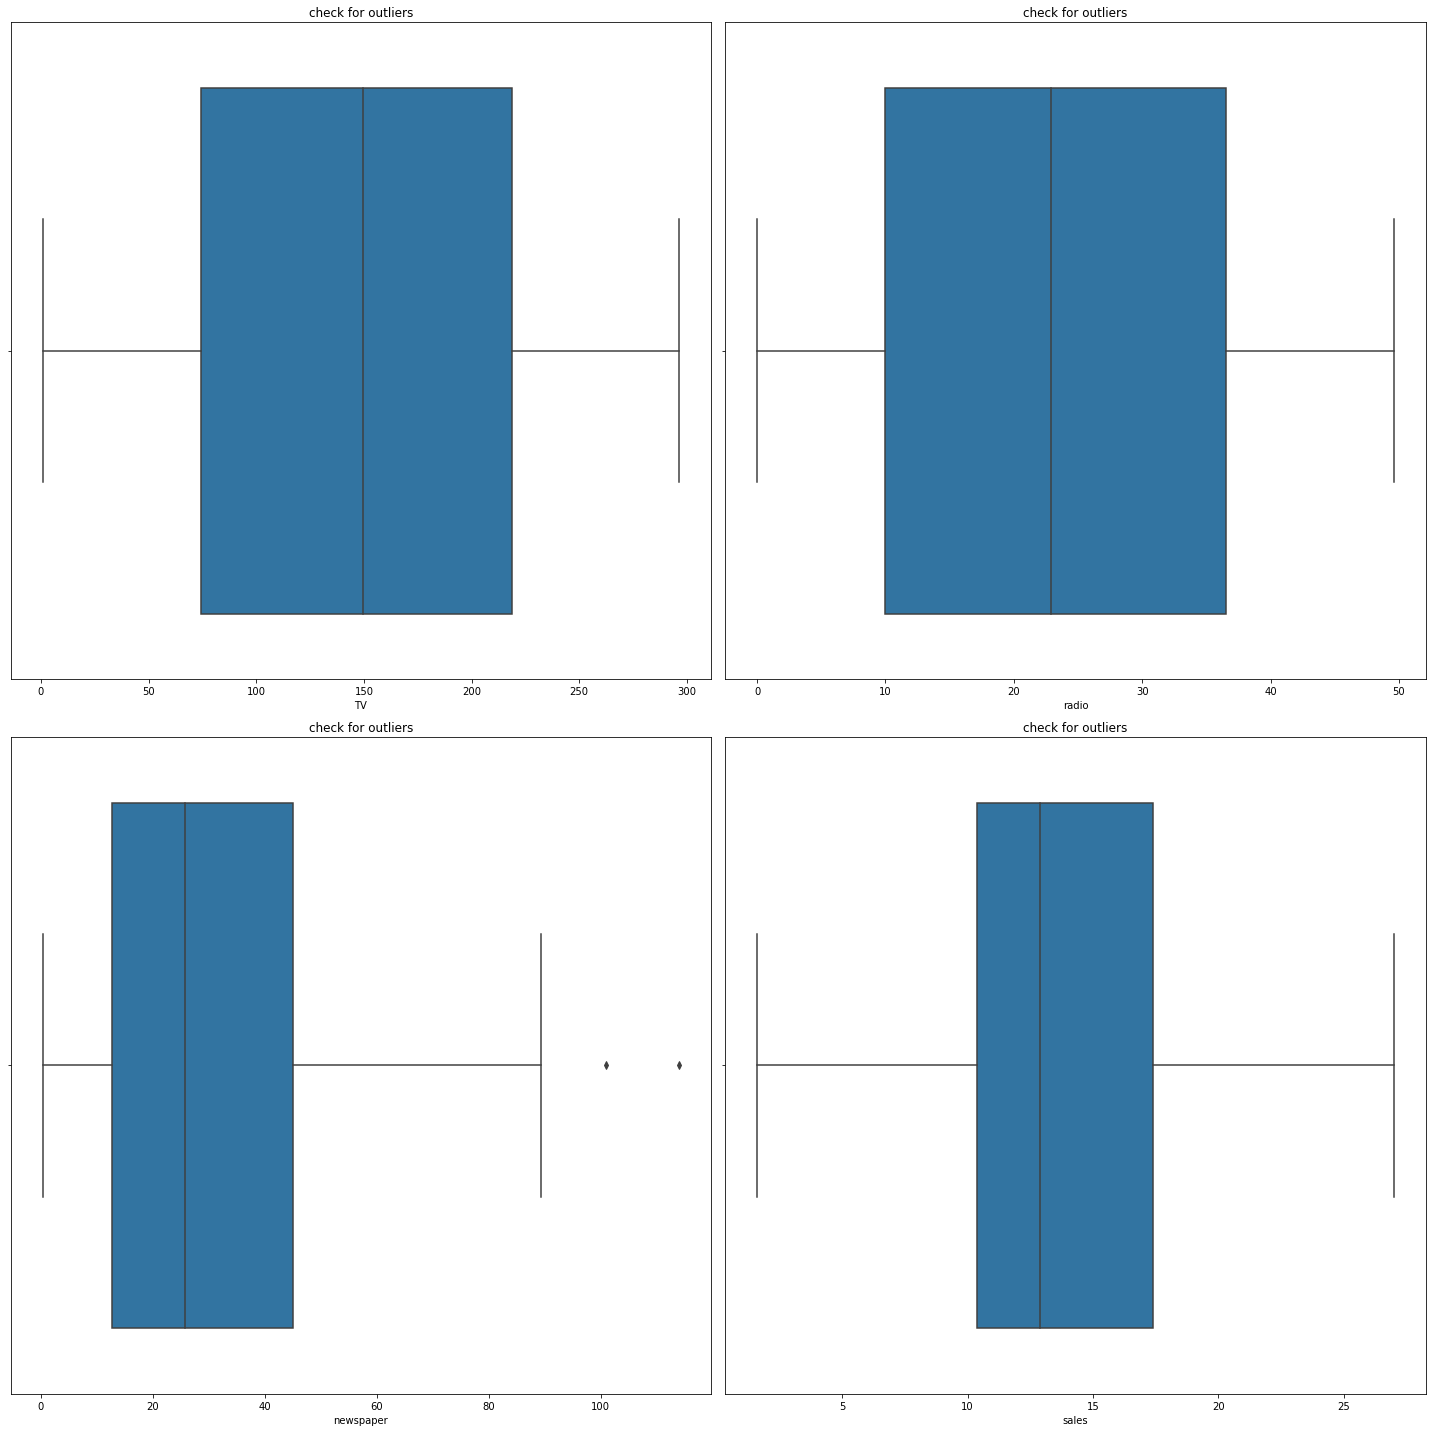

In [9]:
# lets check for the skewness of the data so that we can check for outliers
# bivariate analysis

plt.figure(figsize=(20,20))

plotnumber = 1

for column in df:
    if plotnumber<=4:
        plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
        plt.title('check for outliers')
        plt.xlabel(column)
    plotnumber+=1
    
plt.tight_layout()    

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\l

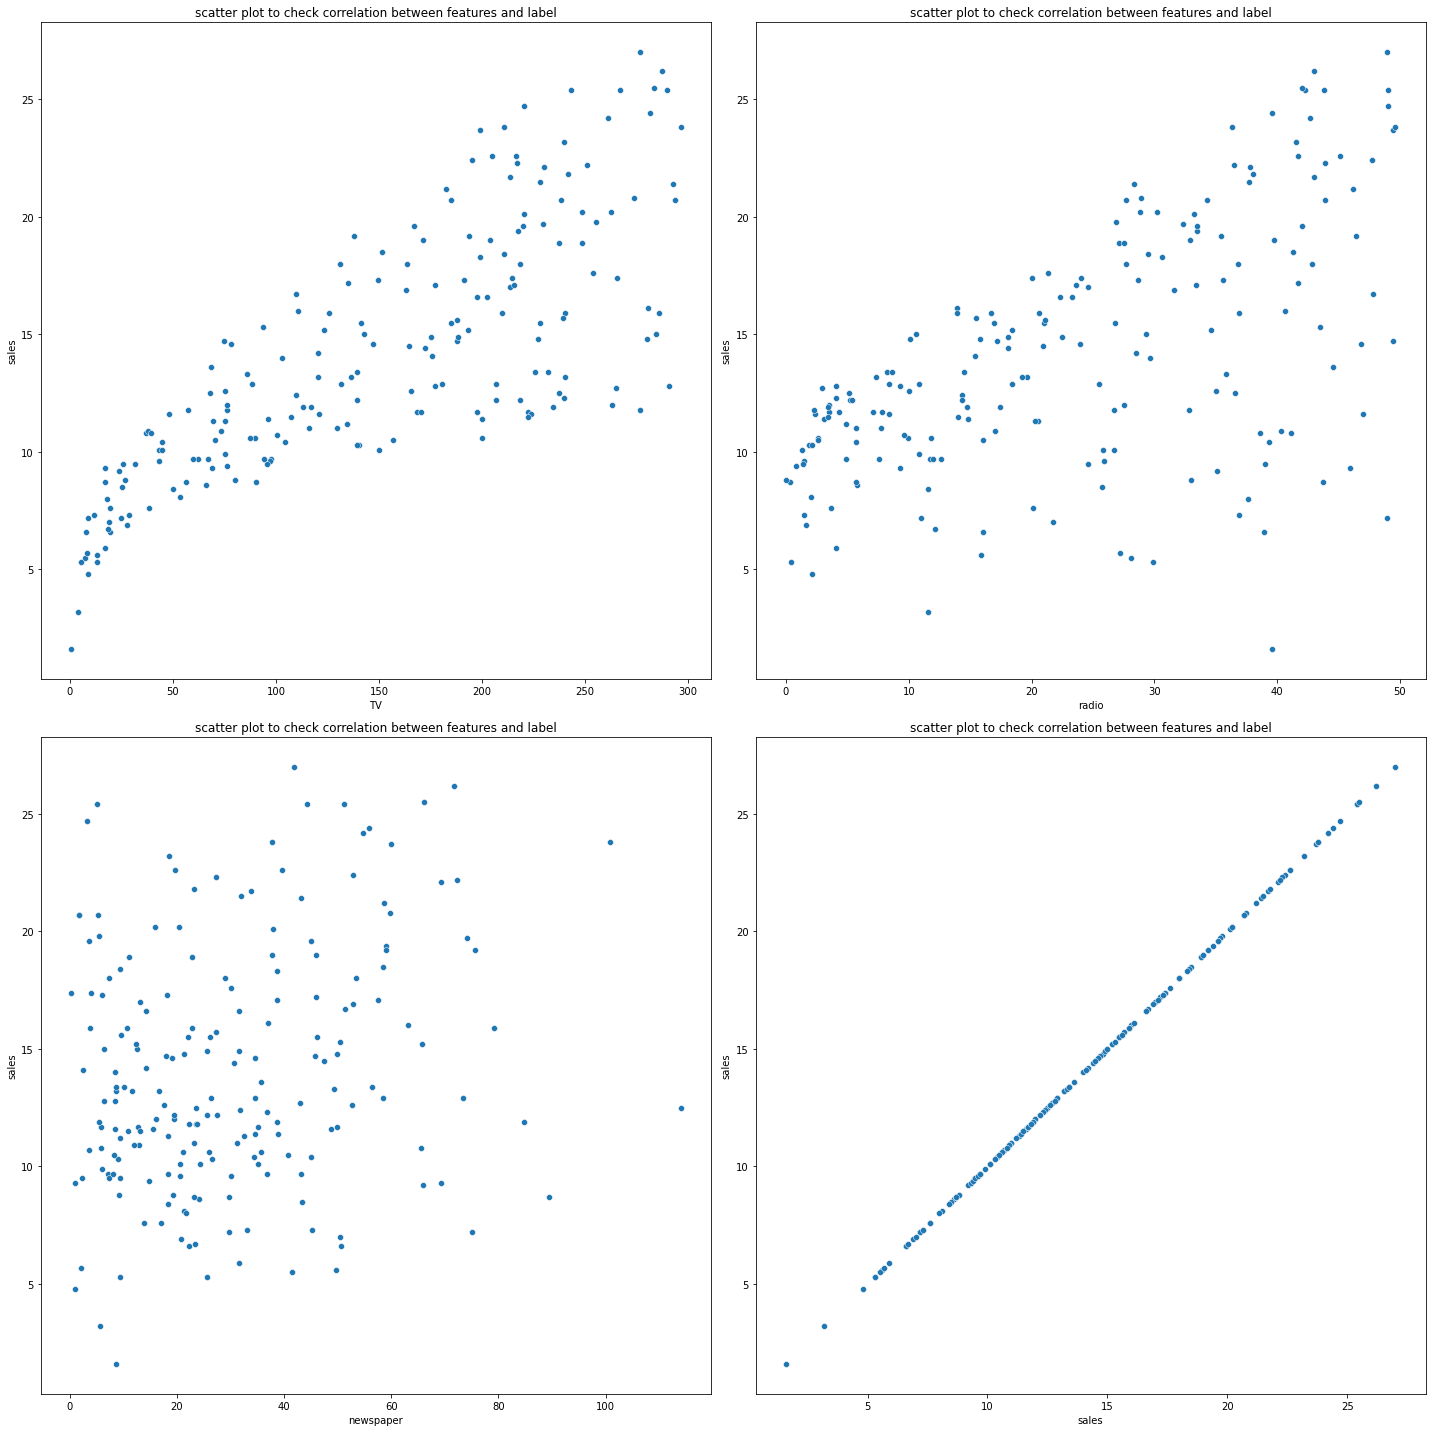

In [11]:
# we only have two outliers in the newspaper column and there is no need to remove it.The data is not skewed
# we have to check the correlation between the features and the label


plt.figure(figsize=(20,20))

plotnumber = 1

for column in df:
    if plotnumber<=4:
        plt.subplot(2,2,plotnumber)
        sns.scatterplot(df[column],df['sales'])
        plt.title('scatter plot to check correlation between features and label')
        plt.xlabel(column)
    plotnumber+=1
    
plt.tight_layout()    

<AxesSubplot:>

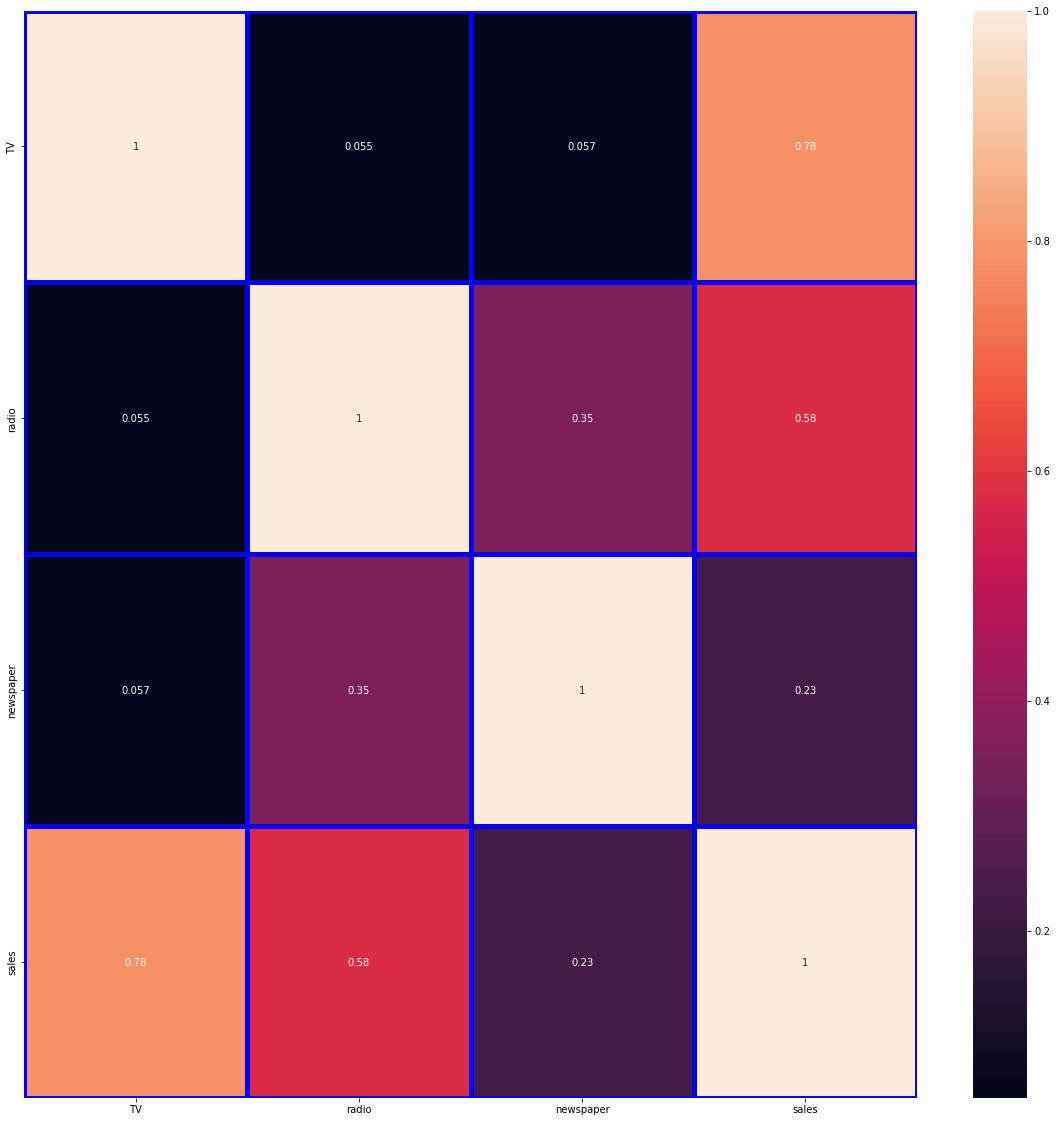

In [12]:
# As we can see from the bivariate analysis,the scatter plot newspaper column feature has no clear correlation with the label(sales) so we will have to drop it.But lets do a correlation plot to reconfirm

plt.figure(figsize=(20,20))

sns.heatmap(df.corr(),annot=True,linewidths=5,linecolor='b')

In [13]:
# As we can see from the correlation plot there is no strong relationship between newspaper feature and sales label.
# We also do not have multicolinearity problem between the features.The colinearity is weak.We will have to drop the newspaper feature


df = df.drop('newspaper',axis=1)
df.head()

,TV,radio,sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9


In [14]:
df.describe()

,TV,radio,sales
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,14.022500
std,85.854236,14.846809,5.217457
min,0.700000,0.000000,1.600000
25%,74.375000,9.975000,10.375000
50%,149.750000,22.900000,12.900000
75%,218.825000,36.525000,17.400000
max,296.400000,49.600000,27.000000


# splitting data for testing and modeling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
y = df['sales']
x = df.drop('sales',axis=1)

In [17]:
# Lets scale the data(features )

scale = StandardScaler()

In [18]:
x_scale = scale.fit_transform(x)

# model creation to find the best model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [20]:
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.2,random_state=i)
    lr = LinearRegression()
    rf = RandomForestRegressor()
    ar = AdaBoostRegressor()
    gr = GradientBoostingRegressor()
    dr = DecisionTreeRegressor()
    kr = KNeighborsRegressor()
    svr = SVR()
    nr = MLPRegressor()
    lr.fit(x_train,y_train)
    rf.fit(x_train,y_train)
    ar.fit(x_train,y_train)
    gr.fit(x_train,y_train)
    dr.fit(x_train,y_train)
       kr.fit(x_train,y_train)
    svr.fit(x_train,y_train)
    nr.fit(x_train,y_train)
    y_pred_lr = lr.predict(x_test)
    y_pred_rf = rf.predict(x_test)
    y_pred_ar = ar.predict(x_test)
    y_pred_gr = gr.predict(x_test)
    y_pred_dr = dr.predict(x_test)
    y_pred_kr = kr.predict(x_test)
    y_pred_svr = svr.predict(x_test)
    y_pred_nr = nr.predict(x_test)
    if r2_score(y_pred_lr,y_test) > 0.93:
        print(f'The r2 score at random state {i} for the lr model is: ',r2_score(y_pred_lr,y_test))
        print(f'The r2 score at random state {i} for the rf model is: ',r2_score(y_pred_rf,y_test))
        print(f'The r2 score at random state {i} for the ar model is: ',r2_score(y_pred_ar,y_test))
        print(f'The r2 score at random state {i} for the gr model is: ',r2_score(y_pred_gr,y_test))
        print(f'The r2 score at random state {i} for the dr model is: ',r2_score(y_pred_dr,y_test))
        print(f'The r2 score at random state {i} for the kr model is: ',r2_score(y_pred_kr,y_test))
        print(f'The r2 score at random state {i} for the svr model is: ',r2_score(y_pred_svr,y_test))
        print(f'The r2 score at random state {i} for the nr model is: ',r2_score(y_pred_nr,y_test))
print('Model done creating')    
    
    
    

IndentationError: unexpected indent (Temp/ipykernel_2248/1783378190.py, line 16)

# These model has the best score at the specified random rate below:
# The r2 score at random state 57 for the lr model is:  0.9302079298463144
# The r2 score at random state 57 for the rf model is:  0.9870665197085619
# The r2 score at random state 57 for the ar model is:  0.9618449019456896
# The r2 score at random state 57 for the gr model is:  0.9870918821117348
# The r2 score at random state 57 for the dr model is:  0.9560141974878088
# The r2 score at random state 57 for the kr model is:  0.9836654405872327
# The r2 score at random state 57 for the svr model is:  0.9500460958113854
# The r2 score at random state 57 for the nr model is:  -16.519056512648984

# The best model is the gradient boosting model with a score of 98.71%

In [21]:
# Lets check for the error

x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.2,random_state=57)
gr = GradientBoostingRegressor()    
gr.fit(x_train,y_train)
y_pred = gr.predict(x_test)
print('The mean square error is:',mean_squared_error(y_pred,y_test))
print('The r2 score:',r2_score(y_pred,y_test))


The mean square error is: 0.3964540013690721
The r2 score: 0.9870918821117348


In [22]:
print('The mean absolute error is :',mean_absolute_error(y_pred,y_test))

The mean absolute error is : 0.49184015112351354


In [23]:
# Lets make some predictions

df.head()

,TV,radio,sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9


In [24]:
gr.predict([[230.1,37.8]])

array([26.55074043])

In [25]:
import statsmodels.api as sm

In [26]:
x_train_sm = sm.add_constant(x_train)
lnr = sm.OLS(y_train,x_train_sm).fit()

lnr.params

const    13.946744
x1        3.818168
x2        2.806017
dtype: float64

In [27]:
print(lnr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     588.9
Date:                Sat, 17 Sep 2022   Prob (F-statistic):           1.08e-73
Time:                        00:24:54   Log-Likelihood:                -315.56
No. Observations:                 160   AIC:                             637.1
Df Residuals:                     157   BIC:                             646.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9467      0.139    100.237      0.0

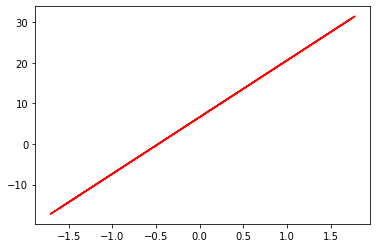

In [28]:
plt.plot(x_train,13.946744*x_train+3.818168+2.806017,'r')

# Lets do hyper parameter tuning with gradient boosting to improve the performance

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold

In [39]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [40]:
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=gr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)

In [32]:
search.fit(x_train,y_train) 
search.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 2000,
 'random_state': 1,
 'subsample': 0.5}

In [33]:
gr_hyper = GradientBoostingRegressor(n_estimators=2000,learning_rate=0.01,subsample=.5,max_depth=4,random_state=1)
score=np.mean(cross_val_score(gr_hyper,x_train,y_train,scoring='neg_mean_squared_error',cv=crossvalidation,n_jobs=1))
score

-0.38844470144068155

In [34]:
gr_hyper.fit(x_train,y_train)
gr_hyper.score(x_train,y_train)

0.9998602815371185

In [35]:
y_pred_hyper = gr_hyper.predict(x_test)

In [36]:
r2_score(y_pred_hyper,y_test)

0.9927441014239596

# As we can see from the above results, the hyperparameter tuning improved the score and error

# Let save our model

In [37]:
import pickle

In [78]:
import pickle

pickle.dump(gr_hyper,open('advert.pickle','wb'))

In [79]:
load_model = pickle.load(open('advert.pickle','rb'))
load_model.fit(x_train,y_train)
load_model.predict(x_test)

array([22.51097213, 15.53363396,  8.71684201, 13.3956516 , 18.53661107,
       18.39868538, 10.41463176, 12.62172768, 18.96785834,  8.77530388,
       24.46959934,  9.17811016, 19.20587356,  4.0253204 , 10.59277972,
       13.32624167,  8.38767568, 10.93668392, 16.80669749, 10.55173098,
        7.01627258, 14.31622101, 14.89118057, 22.55499494,  7.08338359,
       10.97975472,  6.49389637, 11.53192818, 25.53764876,  7.33972381,
       17.97739856, 21.51556151,  6.7003283 , 14.44477131, 17.86741286,
        9.06717824, 15.4835172 , 16.70866286, 18.36260787, 24.69065715])

In [80]:
df.head(5)

,TV,radio,sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9


In [81]:
df.tail()

,TV,radio,sales
195,38.2,3.7,7.6
196,94.2,4.9,9.7
197,177.0,9.3,12.8
198,283.6,42.0,25.5
199,232.1,8.6,13.4
